In [5]:
import umsgpack

def load_meta(meta_file):
    with open(meta_file, "rb") as fid:
        data = umsgpack.load(fid, encoding="utf-8")
        meta = data["meta"]
    return meta

In [8]:
meta_file = r'K:\Research\seamseg\scripts\seamseg_r50_vistas\metadata.bin'

meta = load_meta(meta_file)

In [14]:
import json

w_json_file = r'mapillary_class_index.json'


json.dump(meta, open(w_json_file, 'w'), indent=2)

In [11]:
for k in meta.keys():
    print(k)

num_stuff
num_thing
categories
palette
original_ids


In [16]:
len(meta['categories'])

65

In [17]:
len(meta['original_ids'])

65

In [19]:
len(meta['original_ids', 'categories', 'palette'])

KeyError: ('original_ids', 'categories', 'palette')

In [31]:
import pandas as pd

df = pd.DataFrame(meta['original_ids'])
df.columns = ['original_ids']
df['categories'] = pd.DataFrame(meta['categories'])[0]
df['palette'] = meta['palette']
df.index.name = 'index'
df.to_csv('mapillary_class_index.csv', index=True)

In [12]:
import sys

sys.getsizeof(meta)

240

CompositeGenericTransform(
    Affine2D(
        [[ 0.8660254 -0.5        0.       ]
         [ 0.5        0.8660254  0.       ]
         [ 0.         0.         1.       ]]),
    CompositeGenericTransform(
        TransformWrapper(
            BlendedAffine2D(
                IdentityTransform(),
                IdentityTransform())),
        CompositeGenericTransform(
            BboxTransformFrom(
                TransformedBbox(
                    Bbox(x0=-2.0, y0=-3.0, x1=4.0, y1=2.0),
                    TransformWrapper(
                        BlendedAffine2D(
                            IdentityTransform(),
                            IdentityTransform())))),
            BboxTransformTo(
                TransformedBbox(
                    Bbox(x0=0.125, y0=0.53, x1=0.47727272727272724, y1=0.88),
                    BboxTransformTo(
                        TransformedBbox(
                            Bbox(x0=0.0, y0=0.0, x1=6.4, y1=4.8),
                            Affine2D(


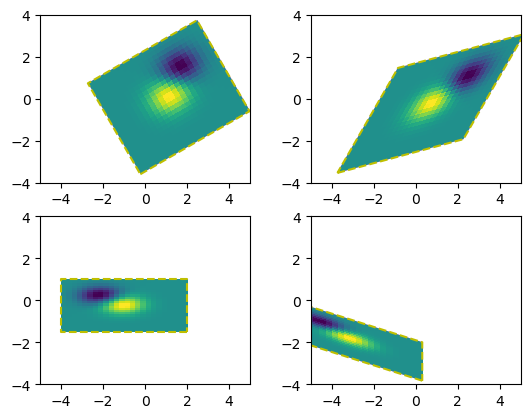

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms


def get_image():
    delta = 0.25
    x = y = np.arange(-3.0, 3.0, delta)
    X, Y = np.meshgrid(x, y)
    Z1 = np.exp(-X**2 - Y**2)
    Z2 = np.exp(-(X - 1)**2 - (Y - 1)**2)
    Z = (Z1 - Z2)
    return Z


def do_plot(ax, Z, transform):
    im = ax.imshow(Z, interpolation='none',
                   origin='lower',
                   extent=[-2, 4, -3, 2], clip_on=True)

    trans_data = transform + ax.transData
    im.set_transform(trans_data)
    
    print(trans_data)

    # display intended extent of the image
    x1, x2, y1, y2 = im.get_extent()
    print('im.get_extent():', im.get_extent())
    ax.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], "y--",
            transform=trans_data)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-4, 4)


# prepare image and figure
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
Z = get_image()

# image rotation
do_plot(ax1, Z, mtransforms.Affine2D().rotate_deg(30))

# image skew
do_plot(ax2, Z, mtransforms.Affine2D().skew_deg(30, 15))

# scale and reflection
do_plot(ax3, Z, mtransforms.Affine2D().scale(-1, .5))

# everything and a translation
do_plot(ax4, Z, mtransforms.Affine2D().
        rotate_deg(30).skew_deg(30, 15).scale(-1, .5).translate(-2, -2))

plt.show()